In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import math
import numpy as np

2023-04-22 14:03:10.208743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# https://sjsu.zoom.us/j/81378627868

In [4]:
import tensorboard
tensorboard.__version__

'2.10.0'

In [4]:
from PIL import Image
import pandas as pd

In [5]:
image_dir = "/Users/andrewtownsend/PycharmProjects/make_tf_work/classes_over_100_df_2"
SEED = 1
W = 224
H = 224
BATCH_SIZE = 10

In [6]:
from functions import *

In [7]:
all_df = get_dataframe(image_dir)

In [8]:
print(all_df.shape)
print(all_df.class_name.value_counts())
display(all_df)

(3110, 4)
style           1348
oxea             451
acanthostyle     402
strongyle        395
sigma            221
pentactin        162
hexactin         131
Name: class_name, dtype: int64


,file_name,class_name,height,width
0,pentactin/01_169_624_189x175.png,pentactin,175,189
1,pentactin/07_1451_20_100x124.png,pentactin,124,100
2,pentactin/14_853_20_198x206.png,pentactin,206,198
3,pentactin/10_1243_20_183x283.png,pentactin,283,183
4,pentactin/04_979_20_194x198.png,pentactin,198,194
...,...,...,...,...
3105,acanthostyle/21_1756_20_49x200.png,acanthostyle,200,49
3106,acanthostyle/16_1776_20_93x235.png,acanthostyle,235,93
3107,acanthostyle/09_608_616_38x176.png,acanthostyle,176,38
3108,acanthostyle/39_74_20_40x243.png,acanthostyle,243,40


In [9]:
train_df, val_and_test_df = \
    train_test_split(all_df, test_size=0.3, random_state = SEED, stratify = all_df.class_name)
val_df, test_df = \
    train_test_split(val_and_test_df, test_size=0.5, random_state=SEED, stratify= val_and_test_df.class_name)

train_df.reset_index(inplace=True, drop=True); val_df.reset_index(inplace=True, drop=True); test_df.reset_index(inplace=True,drop=True)
# train_df.reset_index(inplace=True, drop=True)

In [11]:
print(train_df.shape)
print(train_df.class_name.value_counts())
# print(train_df)
print(val_df.shape)
print(val_df.class_name.value_counts())
print(test_df.shape)
print(test_df.class_name.value_counts())

(2177, 4)
style           944
oxea            316
acanthostyle    281
strongyle       276
sigma           155
pentactin       113
hexactin         92
Name: class_name, dtype: int64
(466, 4)
style           202
oxea             67
acanthostyle     60
strongyle        59
sigma            33
pentactin        25
hexactin         20
Name: class_name, dtype: int64
(467, 4)
style           202
oxea             68
acanthostyle     61
strongyle        60
sigma            33
pentactin        24
hexactin         19
Name: class_name, dtype: int64


In [10]:
train_df.sample(frac= 1, random_state=SEED)
val_df.sample(frac= 1, random_state=SEED)
test_df.sample(frac= 1, random_state=SEED)

,file_name,class_name,height,width
290,acanthostyle/12_1834_656_46x218.png,acanthostyle,218,46
437,strongyle/04_1746_20_46x279.png,strongyle,279,46
287,sigma/29_446_346_57x91.png,sigma,91,57
232,style/05_1039_20_30x404 (1).png,style,404,30
67,sigma/15_1745_20_140x52.png,sigma,52,140
...,...,...,...,...
255,oxea/10_1649_20_27x203.png,oxea,203,27
72,style/03_1311_20_25x387 (1).png,style,387,25
396,sigma/34_1196_292_72x129.png,sigma,129,72
235,pentactin/06_821_665_252x212.png,pentactin,212,252


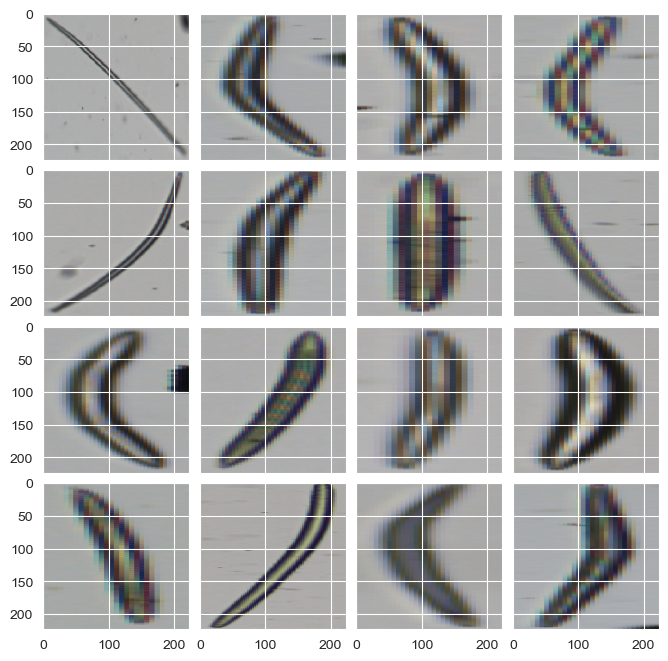

In [11]:
display_img_grid(train_df, 16, "oxea", image_dir, W, H)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

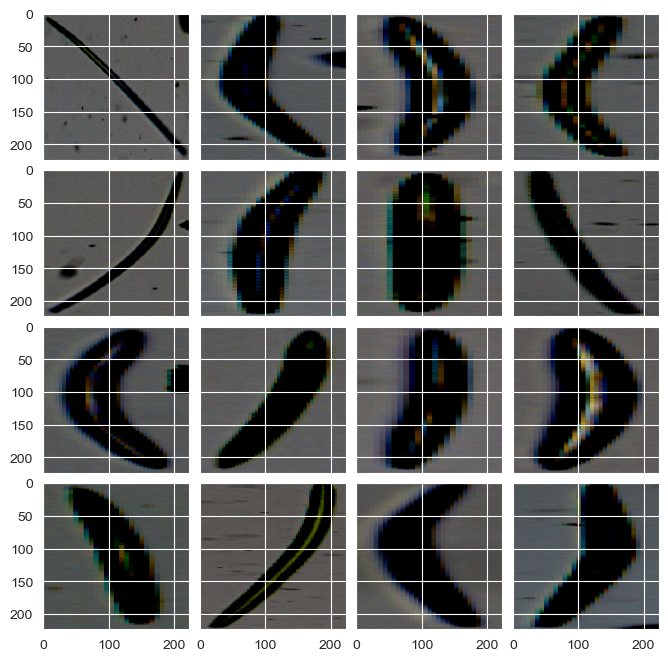

In [12]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input
display_img_grid(train_df, 16, "oxea", image_dir, W, H, preprocess_input)

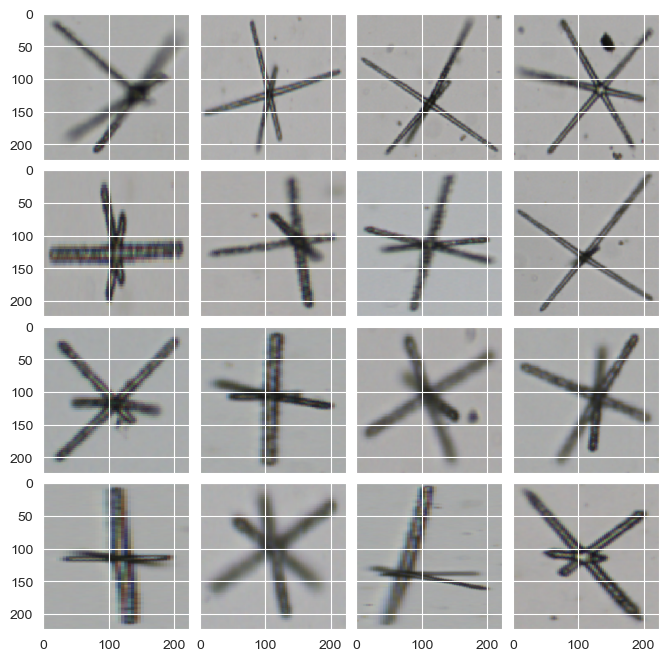

In [13]:
display_img_grid(train_df, 16, "hexactin", image_dir, W, H)

In [14]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="class_name",
    target_size=(W,H),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="class_name",
    target_size=(W,H),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="class_name",
    target_size=(W,H),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=SEED)

Found 2177 validated image filenames belonging to 7 classes.
Found 466 validated image filenames belonging to 7 classes.
Found 467 validated image filenames belonging to 7 classes.


In [41]:
#import Mobilenet model
model = tf.keras.applications.mobilenet.MobileNet()

x = model.layers[-5].output
modifiedLayer = tf.keras.layers.Reshape(target_shape=(1024,))(x)
newLayer = Dense(units=len(test_batches.class_indices), activation='softmax')(modifiedLayer)
newModel = Model(inputs=model.input, outputs=newLayer)

# newModel.summary()

for layer in newModel.layers[:-3]:
    layer.trainable = False
newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
newModel.fit(x = train_batches, validation_data = valid_batches, epochs = 30, verbose = 2)

Epoch 1/30
218/218 - 39s - loss: 0.8344 - accuracy: 0.7056 - val_loss: 0.5293 - val_accuracy: 0.8412 - 39s/epoch - 180ms/step
Epoch 2/30
218/218 - 34s - loss: 0.4757 - accuracy: 0.8273 - val_loss: 0.4370 - val_accuracy: 0.8240 - 34s/epoch - 154ms/step
Epoch 3/30
218/218 - 44s - loss: 0.4087 - accuracy: 0.8443 - val_loss: 0.3917 - val_accuracy: 0.8498 - 44s/epoch - 201ms/step
Epoch 4/30
218/218 - 37s - loss: 0.3631 - accuracy: 0.8695 - val_loss: 0.3990 - val_accuracy: 0.8348 - 37s/epoch - 171ms/step
Epoch 5/30
218/218 - 36s - loss: 0.3261 - accuracy: 0.8787 - val_loss: 0.4385 - val_accuracy: 0.8026 - 36s/epoch - 167ms/step
Epoch 6/30
218/218 - 36s - loss: 0.3033 - accuracy: 0.8865 - val_loss: 0.3661 - val_accuracy: 0.8605 - 36s/epoch - 164ms/step
Epoch 7/30
218/218 - 37s - loss: 0.2831 - accuracy: 0.8948 - val_loss: 0.3596 - val_accuracy: 0.8605 - 37s/epoch - 172ms/step
Epoch 8/30
218/218 - 36s - loss: 0.2743 - accuracy: 0.8939 - val_loss: 0.3501 - val_accuracy: 0.8627 - 36s/epoch - 167

In [15]:
# use this line to import the model from memory
newModel = tf.keras.models.load_model('saved_models/top_seven/04-21-2023_10:19:01')

2023-04-22 14:12:21.040098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
from datetime import datetime

In [79]:
now = datetime.now()
now_str = now.strftime("%m-%d-%Y_%H:%M:%S")
print(now_str)

04-21-2023_10:19:01


In [81]:
newModel.save('saved_models/top_seven/' + now_str)

INFO:tensorflow:Assets written to: saved_models/top_seven/04-21-2023_10:19:01/assets


INFO:tensorflow:Assets written to: saved_models/top_seven/04-21-2023_10:19:01/assets


In [104]:
print(type(test_batches))

<class 'keras.preprocessing.image.DataFrameIterator'>


In [16]:
test_labels = test_batches.classes

In [17]:
print(test_labels[0:20])
print(type(test_labels))
print(len(test_labels))

[6, 6, 5, 6, 6, 6, 5, 6, 6, 2, 6, 6, 6, 6, 6, 6, 0, 2, 2, 5]
<class 'list'>
467


In [18]:
predictions = newModel.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
print(type(predictions))
print(predictions.shape)
print(predictions[0:5])

<class 'numpy.ndarray'>
(467, 7)
[[4.7276135e-08 2.6516085e-07 3.7933670e-03 6.8222248e-06 1.6385376e-07
  4.3476906e-02 9.5272249e-01]
 [3.7661082e-06 1.4770269e-09 4.4443449e-03 9.5452741e-08 1.0033688e-05
  1.6595114e-02 9.7894657e-01]
 [4.9854594e-04 6.7160395e-06 1.6620669e-04 2.8758500e-08 1.0008062e-05
  9.4682223e-01 5.2496243e-02]
 [3.9022480e-06 6.5769223e-07 3.8167208e-02 8.3278124e-08 1.2492202e-04
  4.0087345e-01 5.6082976e-01]
 [4.8143906e-06 5.5338145e-08 3.9146454e-03 1.5875979e-04 1.5893935e-09
  4.2037663e-01 5.7554513e-01]]


In [21]:
predict_indexes = np.argmax(predictions, axis=1)

class_name_to_index = test_batches.class_indices
index_to_class_name = {index: name for name, index in class_name_to_index.items()}
print(predict_indexes[0:10])
print(class_name_to_index)
print(index_to_class_name)

[6 6 5 6 6 5 6 6 6 2]
{'acanthostyle': 0, 'hexactin': 1, 'oxea': 2, 'pentactin': 3, 'sigma': 4, 'strongyle': 5, 'style': 6}
{0: 'acanthostyle', 1: 'hexactin', 2: 'oxea', 3: 'pentactin', 4: 'sigma', 5: 'strongyle', 6: 'style'}


In [22]:
len(predict_indexes)

467

In [23]:
test_predictions_df = test_df.copy()
display(test_predictions_df)

,file_name,class_name,height,width
0,style/04_1553_20_101x494 (1).png,style,494,101
1,style/09_1461_20_45x315 (1).png,style,315,45
2,strongyle/02_1065_20_37x265.png,strongyle,265,37
3,style/04_1455_20_43x301 (1).png,style,301,43
4,style/16_455_20_201x356 (1).png,style,356,201
...,...,...,...,...
462,style/05_1738_20_89x354 (1).png,style,354,89
463,style/11_632_20_41x476 (1).png,style,476,41
464,acanthostyle/22_1367_20_82x253.png,acanthostyle,253,82
465,style/08_475_460_44x401 (1).png,style,401,44


In [24]:
print(test_predictions_df.shape)

(467, 4)


In [25]:
# test_predictions_df["prediction_index"] = predict_indexes
test_predictions_df["prediction_class"] = [index_to_class_name[i] for i in predict_indexes]

In [26]:
display(test_predictions_df)

,file_name,class_name,height,width,prediction_class
0,style/04_1553_20_101x494 (1).png,style,494,101,style
1,style/09_1461_20_45x315 (1).png,style,315,45,style
2,strongyle/02_1065_20_37x265.png,strongyle,265,37,strongyle
3,style/04_1455_20_43x301 (1).png,style,301,43,style
4,style/16_455_20_201x356 (1).png,style,356,201,style
...,...,...,...,...,...
462,style/05_1738_20_89x354 (1).png,style,354,89,strongyle
463,style/11_632_20_41x476 (1).png,style,476,41,style
464,acanthostyle/22_1367_20_82x253.png,acanthostyle,253,82,oxea
465,style/08_475_460_44x401 (1).png,style,401,44,style


In [27]:
misclassified_df = test_predictions_df.loc[test_predictions_df["class_name"] != test_predictions_df["prediction_class"]]

In [28]:
correctly_classified_df = test_predictions_df.loc[test_predictions_df["class_name"] == test_predictions_df['prediction_class']]

In [29]:
display(misclassified_df)
print(misclassified_df.shape)
print(misclassified_df.size)

,file_name,class_name,height,width,prediction_class
5,style/04_1617_20_33x315 (1).png,style,315,33,strongyle
6,strongyle/19_10_20_339x102.png,strongyle,102,339,style
11,style/06_1236_20_44x341 (1).png,style,341,44,oxea
13,style/05_1744_20_33x379 (1).png,style,379,33,strongyle
19,strongyle/02_1483_20_147x321.png,strongyle,321,147,oxea
...,...,...,...,...,...
451,oxea/09_570_375_48x285.png,oxea,285,48,style
458,style/27_640_486_31x282 (1).png,style,282,31,oxea
459,style/10_804_20_35x212 (1).png,style,212,35,oxea
462,style/05_1738_20_89x354 (1).png,style,354,89,strongyle


(75, 5)
375


In [30]:
display(correctly_classified_df)
print(correctly_classified_df.shape)
print(correctly_classified_df.size)

,file_name,class_name,height,width,prediction_class
0,style/04_1553_20_101x494 (1).png,style,494,101,style
1,style/09_1461_20_45x315 (1).png,style,315,45,style
2,strongyle/02_1065_20_37x265.png,strongyle,265,37,strongyle
3,style/04_1455_20_43x301 (1).png,style,301,43,style
4,style/16_455_20_201x356 (1).png,style,356,201,style
...,...,...,...,...,...
460,oxea/08_502_478_43x338.png,oxea,338,43,oxea
461,strongyle/16_731_20_26x285.png,strongyle,285,26,strongyle
463,style/11_632_20_41x476 (1).png,style,476,41,style
465,style/08_475_460_44x401 (1).png,style,401,44,style


(392, 5)
1960


In [31]:
print(misclassified_df.value_counts(subset=["class_name"]))

class_name  
style           38
strongyle       16
oxea             8
pentactin        6
acanthostyle     3
hexactin         2
sigma            2
dtype: int64


In [32]:
print(correctly_classified_df.value_counts(subset=["class_name"]))

class_name  
style           164
oxea             60
acanthostyle     58
strongyle        44
sigma            31
pentactin        18
hexactin         17
dtype: int64


In [33]:
# Group by 'class_name' and 'predicted_class', and count the occurrences
class_counts = test_predictions_df.groupby(['class_name', 'prediction_class']).size().unstack().fillna(0)

In [ ]:
"""
test_predictions_df: It refers to a DataFrame named test_predictions_df which likely contains columns such as 'class_name', 'prediction_class', and other columns with prediction results.

groupby(['class_name', 'prediction_class']): It groups the DataFrame by the columns 'class_name' and 'prediction_class', creating a GroupBy object. This allows for aggregating the data based on these two columns as key values.

size(): It calculates the size (count) of each group within the GroupBy object, i.e., it counts the number of occurrences of each combination of 'class_name' and 'prediction_class'.

unstack(): It transforms the GroupBy object into a wide format DataFrame, with 'class_name' values as index (rows) and 'prediction_class' values as columns, and the count values as the data in the corresponding cells.

fillna(0): It fills any missing (NaN) values in the resulting DataFrame with zeros. This is done to replace any missing counts with zeros, indicating that there were no occurrences of that particular 'class_name' and 'prediction_class' combination in the original DataFrame.

class_counts = ...: Finally, the resulting DataFrame with counts of occurrences for each 'class_name' and 'prediction_class' combination is assigned to a new variable called class_counts, which can be used for further analysis or printing the misclassification rates or other statistics related to the prediction results.
"""

In [34]:
display(class_counts)
print(class_counts.shape, "\n\n")
print(class_counts.acanthostyle, "\n\n")
print(class_counts.index)
print(type(class_counts.index), "\n\n")
print(class_counts.loc["hexactin"])
print(type(class_counts.loc['hexactin']), "\n\n")
print(class_counts.loc['hexactin']['hexactin'])

prediction_class,acanthostyle,hexactin,oxea,pentactin,sigma,strongyle,style
class_name,,,,,,,
acanthostyle,58.0,0.0,3.0,0.0,0.0,0.0,0.0
hexactin,0.0,17.0,0.0,2.0,0.0,0.0,0.0
oxea,1.0,0.0,60.0,0.0,0.0,2.0,5.0
pentactin,0.0,5.0,0.0,18.0,1.0,0.0,0.0
sigma,0.0,0.0,1.0,0.0,31.0,0.0,1.0
strongyle,0.0,0.0,1.0,0.0,0.0,44.0,15.0
style,0.0,0.0,22.0,0.0,0.0,16.0,164.0


(7, 7) 


class_name
acanthostyle    58.0
hexactin         0.0
oxea             1.0
pentactin        0.0
sigma            0.0
strongyle        0.0
style            0.0
Name: acanthostyle, dtype: float64 


Index(['acanthostyle', 'hexactin', 'oxea', 'pentactin', 'sigma', 'strongyle',
       'style'],
      dtype='object', name='class_name')
<class 'pandas.core.indexes.base.Index'> 


prediction_class
acanthostyle     0.0
hexactin        17.0
oxea             0.0
pentactin        2.0
sigma            0.0
strongyle        0.0
style            0.0
Name: hexactin, dtype: float64
<class 'pandas.core.series.Series'> 


17.0


In [35]:
# Calculate the total count of each class
class_totals = class_counts.sum(axis=1)     # axis=1 means that row is fixed and sum is calculated across columns
print(class_totals)

class_name
acanthostyle     61.0
hexactin         19.0
oxea             68.0
pentactin        24.0
sigma            33.0
strongyle        60.0
style           202.0
dtype: float64


In [36]:
class_counts.loc[class_counts.index, class_counts.index].values.diagonal()  # these are the number of correctly classified samples per class

array([ 58.,  17.,  60.,  18.,  31.,  44., 164.])

In [37]:
# Calculate the misclassification rate for each class
# class_counts['misclassification_rate'] = class_counts.sum(axis=1) / class_totals

# Calculate the count of correct classifications over the total classifications for each class
class_counts['class_accuracy'] = (class_counts.loc[class_counts.index, class_counts.index].values.diagonal()) / class_totals


# Print the result
display(class_counts)

prediction_class,acanthostyle,hexactin,oxea,pentactin,sigma,strongyle,style,class_accuracy
class_name,,,,,,,,
acanthostyle,58.0,0.0,3.0,0.0,0.0,0.0,0.0,0.950820
hexactin,0.0,17.0,0.0,2.0,0.0,0.0,0.0,0.894737
oxea,1.0,0.0,60.0,0.0,0.0,2.0,5.0,0.882353
pentactin,0.0,5.0,0.0,18.0,1.0,0.0,0.0,0.750000
sigma,0.0,0.0,1.0,0.0,31.0,0.0,1.0,0.939394
strongyle,0.0,0.0,1.0,0.0,0.0,44.0,15.0,0.733333
style,0.0,0.0,22.0,0.0,0.0,16.0,164.0,0.811881


In [38]:
print(class_counts.shape)

(7, 8)


In [39]:
misclassified_files = misclassified_df["file_name"].tolist()

In [40]:
correctly_classified_files = correctly_classified_df["file_name"].tolist()

In [43]:
last_conv_layer_name = "conv_pw_13_relu"
img_size = (224, 224)
mobilnet_preprocess_input = tf.keras.applications.mobilenet.preprocess_input
parent_directory = image_dir
cams_directory = "/Users/andrewtownsend/PycharmProjects/make_tf_work/cams"

In [52]:
grad_cam_obj_7 = GradCam(model=newModel, layer_name=last_conv_layer_name, preprocess_input=mobilnet_preprocess_input, img_size=img_size)

In [47]:
now = datetime.now()
now_str = now.strftime("%m-%d-%Y_%H:%M:%S")

In [53]:


for dir_and_file in correctly_classified_files:
    temp_img_path = os.path.join(parent_directory, dir_and_file)
    temp_heatmap = grad_cam_obj_7.get_heatmap(temp_img_path)
    temp_superimposed_img = grad_cam_obj_7.get_superimposed_image(temp_img_path, temp_heatmap)
    # check to see if directory exists
    temp_img_directory_path = os.path.join(cams_directory, "correctly_classified/", dir_and_file.split("/")[0])

    if not os.path.exists(temp_img_directory_path):
        os.makedirs(temp_img_directory_path)
        print("========== making: ", temp_img_directory_path, flush=True)

    print("should be printing ", dir_and_file, " to: ", os.path.join(cams_directory, "correctly_classified/",dir_and_file), flush=True)
    temp_superimposed_img.save(os.path.join(cams_directory, "correctly_classified/",dir_and_file))


========== making:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/style
should be printing  style/04_1553_20_101x494 (1).png  to:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/style/04_1553_20_101x494 (1).png
should be printing  style/09_1461_20_45x315 (1).png  to:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/style/09_1461_20_45x315 (1).png
========== making:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/strongyle
should be printing  strongyle/02_1065_20_37x265.png  to:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/strongyle/02_1065_20_37x265.png
should be printing  style/04_1455_20_43x301 (1).png  to:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correctly_classified/style/04_1455_20_43x301 (1).png
should be printing  style/16_455_20_201x356 (1).png  to:  /Users/andrewtownsend/PycharmProjects/make_tf_work/cams/correc

In [162]:
print(len(misclassified_files))

75


In [163]:
print(os.path.join(cams_directory, "misclassified/","some_file.png"))

/Users/andrewtownsend/PycharmProjects/make_tf_work/cams/misclassified/some_file.png


In [156]:
print(misclassified_files[0:5])

['style/04_1617_20_33x315 (1).png', 'strongyle/19_10_20_339x102.png', 'style/06_1236_20_44x341 (1).png', 'style/05_1744_20_33x379 (1).png', 'strongyle/02_1483_20_147x321.png']


In [77]:
!pwd

/Users/andrewtownsend/PycharmProjects/make_tf_work


In [127]:
last_conv_layer_name = "conv_pw_13_relu"
img_size = (224, 224)
mobilnet_preprocess_input = tf.keras.applications.mobilenet.preprocess_input
img_path = '/Users/andrewtownsend/PycharmProjects/make_tf_work/classes_over_100/test/pentactin/17_1498_583_128x175.png'

In [51]:
grad_cam_obj = GradCam(model=newModel, layer_name=last_conv_layer_name, preprocess_input=mobilnet_preprocess_input, img_size=img_size)

In [151]:
heatmap = grad_cam_obj.get_heatmap(img_path)

In [153]:
grad_cam_obj.display_gradcam(img_path, heatmap)
grad_cam_obj.display_gradcam(img_path, smolheatmap)

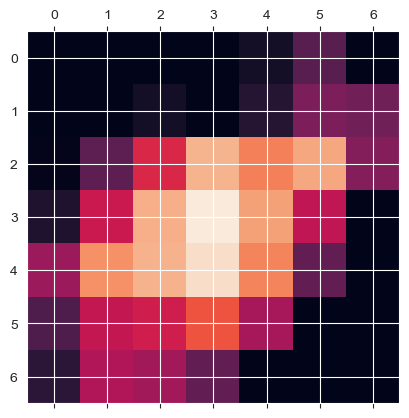

In [117]:
plt.matshow(heatmap)
plt.show()

In [130]:
last_56x56_conv_layer = 'conv_pw_3_relu'
grad_cam_obj_56 = GradCam(model=newModel, layer_name=last_56x56_conv_layer, preprocess_input=mobilnet_preprocess_input, img_size=img_size)

In [131]:
bigheatmap = grad_cam_obj_56.get_heatmap(img_path)

In [140]:
last_28x28_conv_layer ='conv_pw_5_relu'
grad_cam_obj_28 = GradCam(model=newModel, layer_name=last_28x28_conv_layer, preprocess_input=mobilnet_preprocess_input, img_size=img_size)
medheatmap = grad_cam_obj_28.get_heatmap(img_path)

In [142]:
last_14x14_conv_layer = 'conv_pw_11_relu'
grad_cam_obj_14 = GradCam(model=newModel, layer_name=last_14x14_conv_layer, preprocess_input=mobilnet_preprocess_input, img_size=img_size)
smolheatmap = grad_cam_obj_14.get_heatmap(img_path)

<class 'tuple'>
(224, 224)
<class 'str'>
/Users/andrewtownsend/PycharmProjects/make_tf_work/classes_over_100/test/pentactin/17_1498_583_128x175.png


<function matplotlib.pyplot.show(close=None, block=None)>

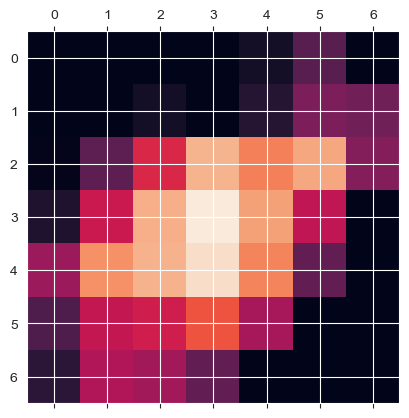

In [123]:
plt.matshow(bigheatmap)
plt.show

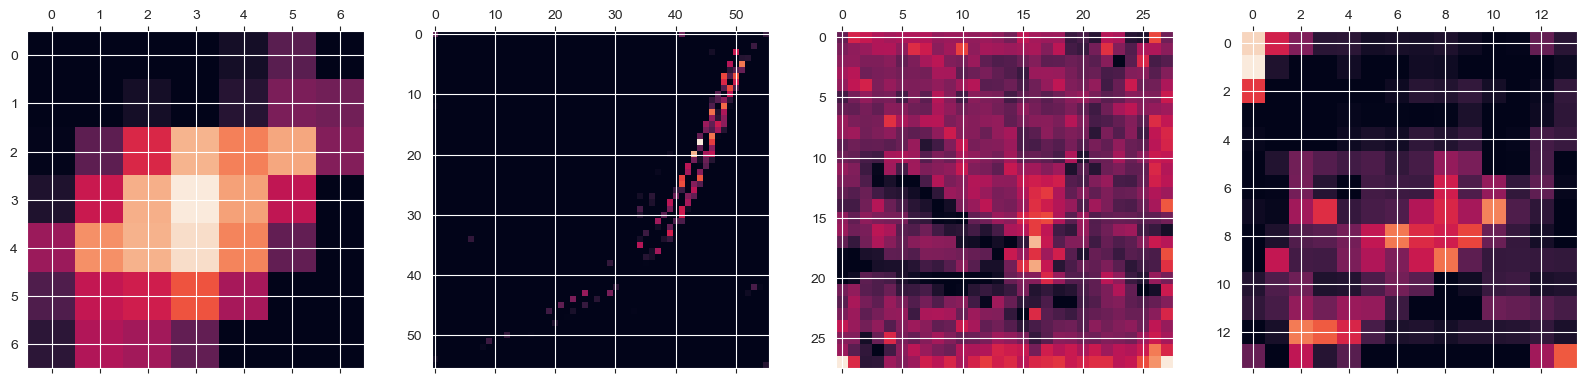

In [146]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.matshow(heatmap)
ax2.matshow(bigheatmap)
ax3.matshow(medheatmap)
ax4.matshow(smolheatmap)
# fig.colorbar(ax1.matshow(heatmap), ax=ax1)
# fig.colorbar(ax2.matshow(bigheatmap), ax=ax2)
plt.show()

In [49]:
import matplotlib.cm as cm

In [50]:
class GradCam:
    def __init__(self, model, layer_name: str, preprocess_input, img_size):
        self.model = model
        self.layer_name = layer_name
        self.preprocess_input = preprocess_input
        self.img_size = img_size

    # def save_grad_cam_images()

    def get_heatmap(self, img_path: str):
        img_array = preprocess_input(self.get_img_array(img_path=img_path, size=self.img_size))

        temp_activation = self.model.layers[-1].activation
        self.model.layers[-1].activation = None

        heatmap = self.make_gradcam_heatmap(img_array, self.model, self.layer_name)

        self.model.layers[-1].activation = temp_activation

        return heatmap

    # from: https://keras.io/examples/vision/grad_cam/

    def get_img_array(self, img_path: str, size: tuple[int, int]):
        # `img` is a PIL image of size 299x299
        img = keras.preprocessing.image.load_img(img_path, target_size=size)
        # `array` is a float32 Numpy array of shape (299, 299, 3)
        array = keras.preprocessing.image.img_to_array(img)
        # We add a dimension to transform our array into a "batch"
        # of size (1, 299, 299, 3)
        array = np.expand_dims(array, axis=0)
        return array


    def make_gradcam_heatmap(self, img_array, model, last_conv_layer_name, pred_index=None):
        # First, we create a model that maps the input image to the activations
        # of the last conv layer as well as the output predictions
        grad_model = tf.keras.models.Model(
            #? here model is created with one input layer mapped to two different output layers
            #? the last conv layer is just an intermediate step on the way
            [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
        )

        # Then, we compute the gradient of the top predicted class for our input image
        # with respect to the activations of the last conv layer
        #* gradient tape records the gradient of one thing with respect to another
        #* In TensorFlow, by default, the GradientTape automatically watches and keeps track
        #* of all variables that are accessed within the tape context
        with tf.GradientTape() as tape:
            #? does this catch the output from the last convolutional layer and the model.output layer
            last_conv_layer_output, preds = grad_model(img_array)
            #? what is the prediction index...?
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]

        # This is the gradient of the output neuron (top predicted or chosen)
        # with regard to the output feature map of the last conv layer
        grads = tape.gradient(class_channel, last_conv_layer_output)

        # This is a vector where each entry is the mean intensity of the gradient
        # over a specific feature map channel
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))                #* computes the mean along the spatial dimensions
                                                                            #* (height, width) as well as the channel dimension
                                                                            #* of the feature map

        # We multiply each channel in the feature map array
        # by "how important this channel is" with regard to the top predicted class
        # then sum all the channels to obtain the heatmap class activation
        last_conv_layer_output = last_conv_layer_output[0]                  #* get rid of batch number
        #* @ is python dot product operator implemented in numpy
        heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]    #[..., tf.newaxis] just means add a new axis to each row
        heatmap = tf.squeeze(heatmap)                                       # ex: [[1], [5], [7]] -> [1, 5, 7]

        # For visualization purpose, we will also normalize the heatmap between 0 & 1
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    def get_superimposed_image(self, img_path, heatmap, cam_path="cam.jpg", alpha=0.4, size=(224,224)):    # size is (W, H)?
        # Load the original image
        img = keras.preprocessing.image.load_img(img_path)
        img = img.resize(size)
        img = keras.preprocessing.image.img_to_array(img)

        # Rescale heatmap to a range 0-255
        heatmap = np.uint8(255 * heatmap)

        # Use jet colormap to colorize heatmap
        jet = cm.get_cmap("jet")

        # Use RGB values of the colormap
        jet_colors = jet(np.arange(256))[:, :3]
        # jet(np.arange(256)) generates a 256x4 array containing RGBA values for the entire range of the colormap.
        # The np.arange(256) function generates an array containing integers from 0 to 255, which is used to map each
        # color in the colormap to a corresponding integer value in the range 0 to 255. The [:, :3] indexing operation
        # extracts only the RGB values from the RGBA array, discarding the alpha channel.
        jet_heatmap = jet_colors[heatmap]
        # In the second line, jet_colors[heatmap] applies the "jet" colormap to the heatmap by indexing the jet_colors
        # array with the heatmap array. The heatmap array contains the scalar values that we want to map to colors using
        # the "jet" colormap. By indexing jet_colors with heatmap, we map each value in heatmap to a corresponding color
        # in the "jet" colormap. The resulting jet_heatmap array is a colorized version of the original grayscale heatmap,
        # where each scalar value has been mapped to a corresponding color in the "jet" colormap.

        # Create an image with RGB colorized heatmap


        jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
        # jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
        jet_heatmap = jet_heatmap.resize(size)
        jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

        # Superimpose the heatmap on original image
        superimposed_img = jet_heatmap * alpha + img
        superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

        # Save the superimposed image
        # superimposed_img.save(cam_path)

        # Display Grad CAM
        # display(Image(cam_path))
        # superimposed_img.show()
        return superimposed_img

In [62]:
cm = confusion_matrix(y_true = test_labels, y_pred = predictions.argmax(axis = 1))

Confusion matrix, without normalization
[[ 58   0   3   0   0   0   0]
 [  0  17   0   2   0   0   0]
 [  1   0  60   0   0   2   5]
 [  0   5   0  18   1   0   0]
 [  0   0   1   0  31   0   1]
 [  0   0   1   0   0  44  15]
 [  0   0  22   0   0  16 164]]


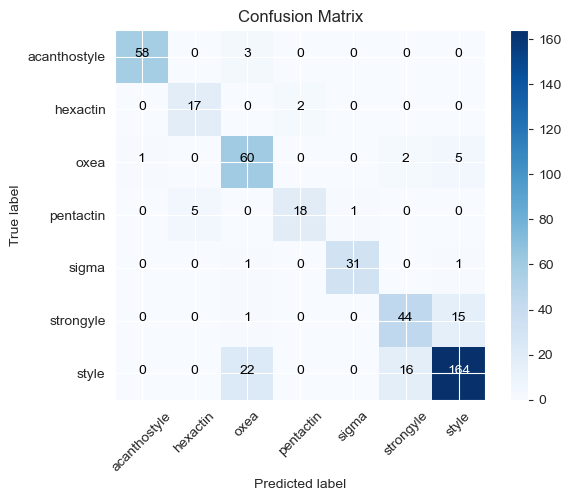

In [63]:
cm_plot_labels = list(test_batches.class_indices.keys())
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')